In [43]:
import PyCC
import numpy as np
import matplotlib.pyplot as plt

def plot_pretty(dpi=150,fontsize=15):
    plt.rcParams['figure.dpi']= dpi
    plt.rc("savefig", dpi=dpi)
    plt.rc('font', size=fontsize)
    plt.rc('xtick', direction='in')
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=5)
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=5)
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [2., 2.])
    plt.rc('legend',fontsize=5)
    plt.rcParams['figure.figsize'] = [5, 5]

plot_pretty()

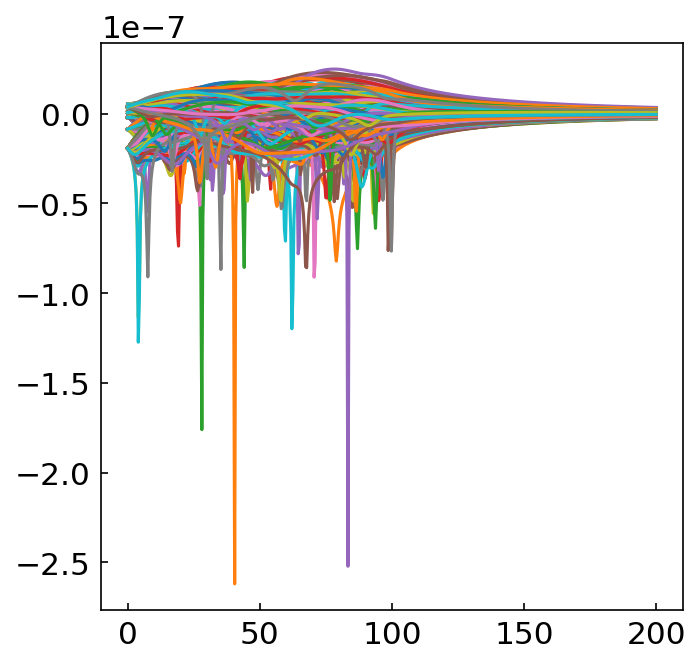

In [146]:

r = 100
ray_length = r*2
p = 0.1
ray_steps = 500

x = list(PyCC.ray_rs(ray_length,ray_steps))
xs = []
ys = []

rays = []
for vector in PyCC.random_vectors(100):
    rays.append(PyCC.ray(vector,ray_length,ray_steps))

for i in range(10):
    df = PyCC.Distributions.Uniform(r=r,n=1000,p=p)

    for ray in rays:
        out,ray_out,stats = PyCC.evaluate(df,evaluate_at=ray,steps=0,precision="double")
        ray_analytics = PyCC.Analytic.Uniform(r=r,p=p,positions=ray)
        ray_phis = ray_out.loc[:,"phi"].to_numpy()
        x = PyCC.points2radius(ray)
        y = ray_phis - ray_analytics
        plt.plot(x,y)
        xs += list(x)
        ys += list(y)

xs = np.array(xs)
ys = np.array(ys)
plt.show()

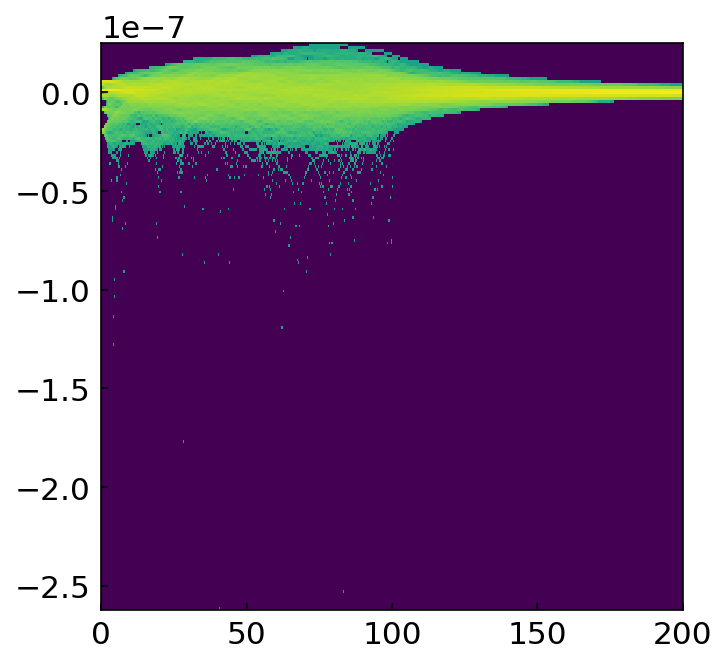

In [147]:
H,xedges,yedges = np.histogram2d(xs,ys,bins=[int(ray_steps),200],density=True)
H = np.log10(H.T + 1)
X, Y = np.meshgrid(xedges, yedges)
plt.pcolormesh(X, Y, H)
plt.show()